Exercise Objectives:

- PCA (Principal Component Analysis)
Surprisingly in the real world many features are highly correlated (Andre Ng)
PCA uses Singular Value Decomposition, and allows us to reduce the number of features 
(reduce the dimension of the dataset)
In the example below the Breast Cancer Dataset is composed of 30 features. By doing PCA we are able to recreate the dataset with only 16 new features (components) while retaining 99% of the data variance. 

PCA has two main uses: 
- If we have a large number of features, PCA allows us to reduce the number of features so we can speed up the learning algorithm
- Help us visualize the data

PCA shouldn't:
- It shouldn't be used to prevent overfitting
- It shouldn't be used on your testing set

Note: before doing PCA, it's a standard practice to first perform mean normalization (MinMaxScaler) so new features have comparable range of values  

Breast Cancer DataSet:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

kernels (results from other people): https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/kernels


In [1]:
def readData():
    import pandas as pd
    df = pd.read_csv('cancer.txt')
    
    cancer = df.drop(df.columns[[0,32]],axis=1)
    y_cancer = cancer['diagnosis'].apply(lambda x: 0 if x in 'B' else 1)
    X_cancer = cancer.drop(cancer.columns[[0]],axis=1)
    return(X_cancer, y_cancer)

In [2]:
def returnColumnNames():
    (X,y) = readData()
    print('X: ', X.columns.values, '\ny: ',y.name)

In [3]:
def decisionTree():
    
    import numpy as np
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    
    scaler = MinMaxScaler()
    (X,y) = readData()
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       random_state = 0)
    # both training set and testing set need to be scaled
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    tree = DecisionTreeClassifier(max_depth=2,random_state=0).fit(X_train_scaled, y_train)
    print(tree.feature_importances_)
    print(returnColumnNames())
    return (tree.score(X_train_scaled, y_train),tree.score(X_test_scaled, y_test))

decisionTree()

[ 0.          0.          0.          0.          0.          0.          0.
  0.86015457  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.13984543  0.          0.          0.          0.
  0.          0.        ]
X:  ['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean' 'radius_se'
 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se' 'compactness_se'
 'concavity_se' 'concave points_se' 'symmetry_se' 'fractal_dimension_se'
 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'] 
y:  diagnosis
None


(0.94131455399061037, 0.93706293706293708)

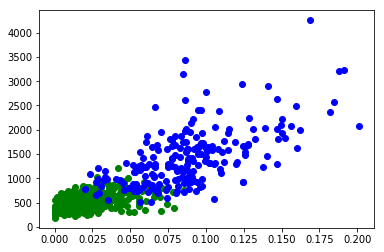

In [4]:
def plotTopTwoFeatures():
    import matplotlib.pyplot as plt
    import pandas as pd
    
    pd.options.mode.chained_assignment = None # to stop warning
    
    (X,y) = readData()
    df = X[['concave points_mean','area_worst']]
    df['diagnosis'] = y
    benign = df[df['diagnosis'] == 0]
    malign = df[df['diagnosis'] == 1]
    
    plt.plot(benign['concave points_mean'],benign['area_worst'],'go')
    plt.plot(malign['concave points_mean'],malign['area_worst'],'bo')
    plt.show()

plotTopTwoFeatures()

16


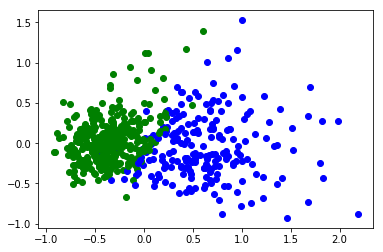

(0.96948356807511737, 0.94405594405594406)

In [5]:
# let's get a good model using the data from PCA and use it with the real data

def PCAAnalysis():
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    import matplotlib.pyplot as plt
    
    scaler = MinMaxScaler()
    (X,y) = readData()
    
    ## use PCA to get a good model: do not use the test set, just the training set to get your model, remember!
    # always scale your data for PCA first
    X_scaled = scaler.fit_transform(X)
    
    # keep 99% of the variance (99% of the data) this is standard
    pca = PCA(svd_solver = 'full', n_components=.99)
    
    # let's get now a reduced dataset
    X_pca = pca.fit(X_scaled).transform(X_scaled)
    
    # in this case 16 components explain 99% of the data variance
    # if you have a million rows: processing 1'000,000x16 is faster than 1'000,000x30 
    print(pca.n_components_)
    
    # plot the first two components from PCA (the two most important of the new dataset)
    # notice the plot is similar to the plot of the top two features of the breast cancer data
    for i in range(len(y)):
        plt.plot(X_pca[i,0],X_pca[i,1],'go') if y[i] == 0 else plt.plot(X_pca[i,0],X_pca[i,1],'bo')
    plt.show()
    
    # we still want to split the data to use GridSearchCV, we will not use the test data for this part
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y,
                                                       random_state = 0)
    
    parameters = {'kernel':('linear', 'rbf'), 'C':[1,5,10,20,50]}
    clf = GridSearchCV(SVC(), parameters)
    clf.fit(X_train_pca,y_train_pca)
    bestSVCfromPCA = clf.best_estimator_.fit(X_train_pca,y_train_pca)

    ## now use the best model found by PCA with the real data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       random_state = 0)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    svc = bestSVCfromPCA.fit(X_train,y_train)
    return (svc.score(X_train, y_train),svc.score(X_test, y_test))
    
PCAAnalysis()